## Data Decription :

## Import to work with :

In [14]:
import warnings
warnings.filterwarnings("ignore")

import copy 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import category_encoders as ce

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier
from xgboost import XGBClassifier


## Reading Data :

In [2]:
data = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Ownership.csv")

## Preparing a copy from the original data :

In [3]:
copied_data=copy.deepcopy(data)

## Printing the data head :

In [6]:
data.head(7)

,Age,Education Level,Gender,Internet Connection,Marital Status,Movie Selector,Num Bathrooms,Num Bedrooms,Num Cars,Num Children,...,PPV Freq,Prerec Buying Freq,Prerec Format,Prerec Renting Freq,Prerec Viewing Freq,CustomerID,Theater Freq,TV Movie Freq,TV Signal,Home Ownership
0,33,Doctorate,Male,Dial-Up,Married,Spouse/Partner,2.5,3,1,0,...,Rarely,Monthly,DVD,Rarely,Monthly,877687,Monthly,Monthly,Cable,Own
1,47,Doctorate,Male,DSL,Married,Spouse/Partner,2.0,2,2,1,...,Never,Monthly,DVD,Monthly,Weekly,877723,Rarely,Weekly,Cable,Own
2,35,Bachelor's Degree,Male,Cable Modem,Married,Me,2.5,4,2,2,...,Rarely,Rarely,DVD,Monthly,Monthly,877792,Rarely,Daily,Cable,Own
3,32,Bachelor's Degree,Male,Cable Modem,Married,Me,3.5,5,2,2,...,Never,Rarely,DVD,Monthly,Monthly,877840,Monthly,Weekly,Cable,Own
4,32,Bachelor's Degree,Male,No Internet Connection,Married,Me,2.5,4,2,0,...,Rarely,Rarely,DVD,Weekly,Weekly,877988,Weekly,Weekly,Digital Satellite,Own
5,32,Master's Degree,Male,DSL,Married,Me,2.5,4,2,2,...,Never,Never,VHS,Rarely,Rarely,878821,Rarely,Weekly,Cable,Own
6,32,Bachelor's Degree,Male,DSL,Married,Me,2.0,4,2,0,...,Rarely,Rarely,DVD,Monthly,Monthly,878822,Monthly,Rarely,Cable,Rent


## Getting info about the data and description for the numerical columns :

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3085 non-null   int64  
 1   Education Level      3085 non-null   object 
 2   Gender               3085 non-null   object 
 3   Internet Connection  3085 non-null   object 
 4   Marital Status       3085 non-null   object 
 5   Movie Selector       3085 non-null   object 
 6   Num Bathrooms        3085 non-null   float64
 7   Num Bedrooms         3085 non-null   int64  
 8   Num Cars             3085 non-null   int64  
 9   Num Children         3085 non-null   int64  
 10  Num TVs              3085 non-null   int64  
 11  PPV Freq             3085 non-null   object 
 12  Prerec Buying Freq   3085 non-null   object 
 13  Prerec Format        3085 non-null   object 
 14  Prerec Renting Freq  3085 non-null   object 
 15  Prerec Viewing Freq  3085 non-null   o

In [22]:
data.describe()

,Age,Num Bathrooms,Num Bedrooms,Num Cars,Num Children,Num TVs,CustomerID
count,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000
mean,33.156240,2.096759,2.878444,1.682658,0.806483,2.098865,897854.733225
std,7.239346,0.812988,1.150117,0.802138,1.111995,1.230140,12692.682200
min,20.000000,0.500000,1.000000,0.000000,0.000000,0.000000,877687.000000
25%,28.000000,1.500000,2.000000,1.000000,0.000000,1.000000,888787.000000
50%,32.000000,2.000000,3.000000,2.000000,0.000000,2.000000,891654.000000
75%,38.000000,2.500000,4.000000,2.000000,2.000000,3.000000,912515.000000
max,62.000000,5.000000,10.000000,6.000000,6.000000,10.000000,927818.000000


In [23]:
data.columns

Index(['Age', 'Education Level', 'Gender', 'Internet Connection',
       'Marital Status', 'Movie Selector', 'Num Bathrooms', 'Num Bedrooms',
       'Num Cars', 'Num Children', 'Num TVs', 'PPV Freq', 'Prerec Buying Freq',
       'Prerec Format', 'Prerec Renting Freq', 'Prerec Viewing Freq',
       'CustomerID', 'Theater Freq', 'TV Movie Freq', 'TV Signal',
       'Home Ownership'],
      dtype='object')

In [24]:
data.isna().sum()

Age                    0
Education Level        0
Gender                 0
Internet Connection    0
Marital Status         0
Movie Selector         0
Num Bathrooms          0
Num Bedrooms           0
Num Cars               0
Num Children           0
Num TVs                0
PPV Freq               0
Prerec Buying Freq     0
Prerec Format          0
Prerec Renting Freq    0
Prerec Viewing Freq    0
CustomerID             0
Theater Freq           0
TV Movie Freq          0
TV Signal              0
Home Ownership         0
dtype: int64

In [98]:
data.duplicated().sum()

0

In [25]:
data["Home Ownership"].value_counts()

Home Ownership
Own     1996
Rent    1089
Name: count, dtype: int64

## Visualized representation for the data :

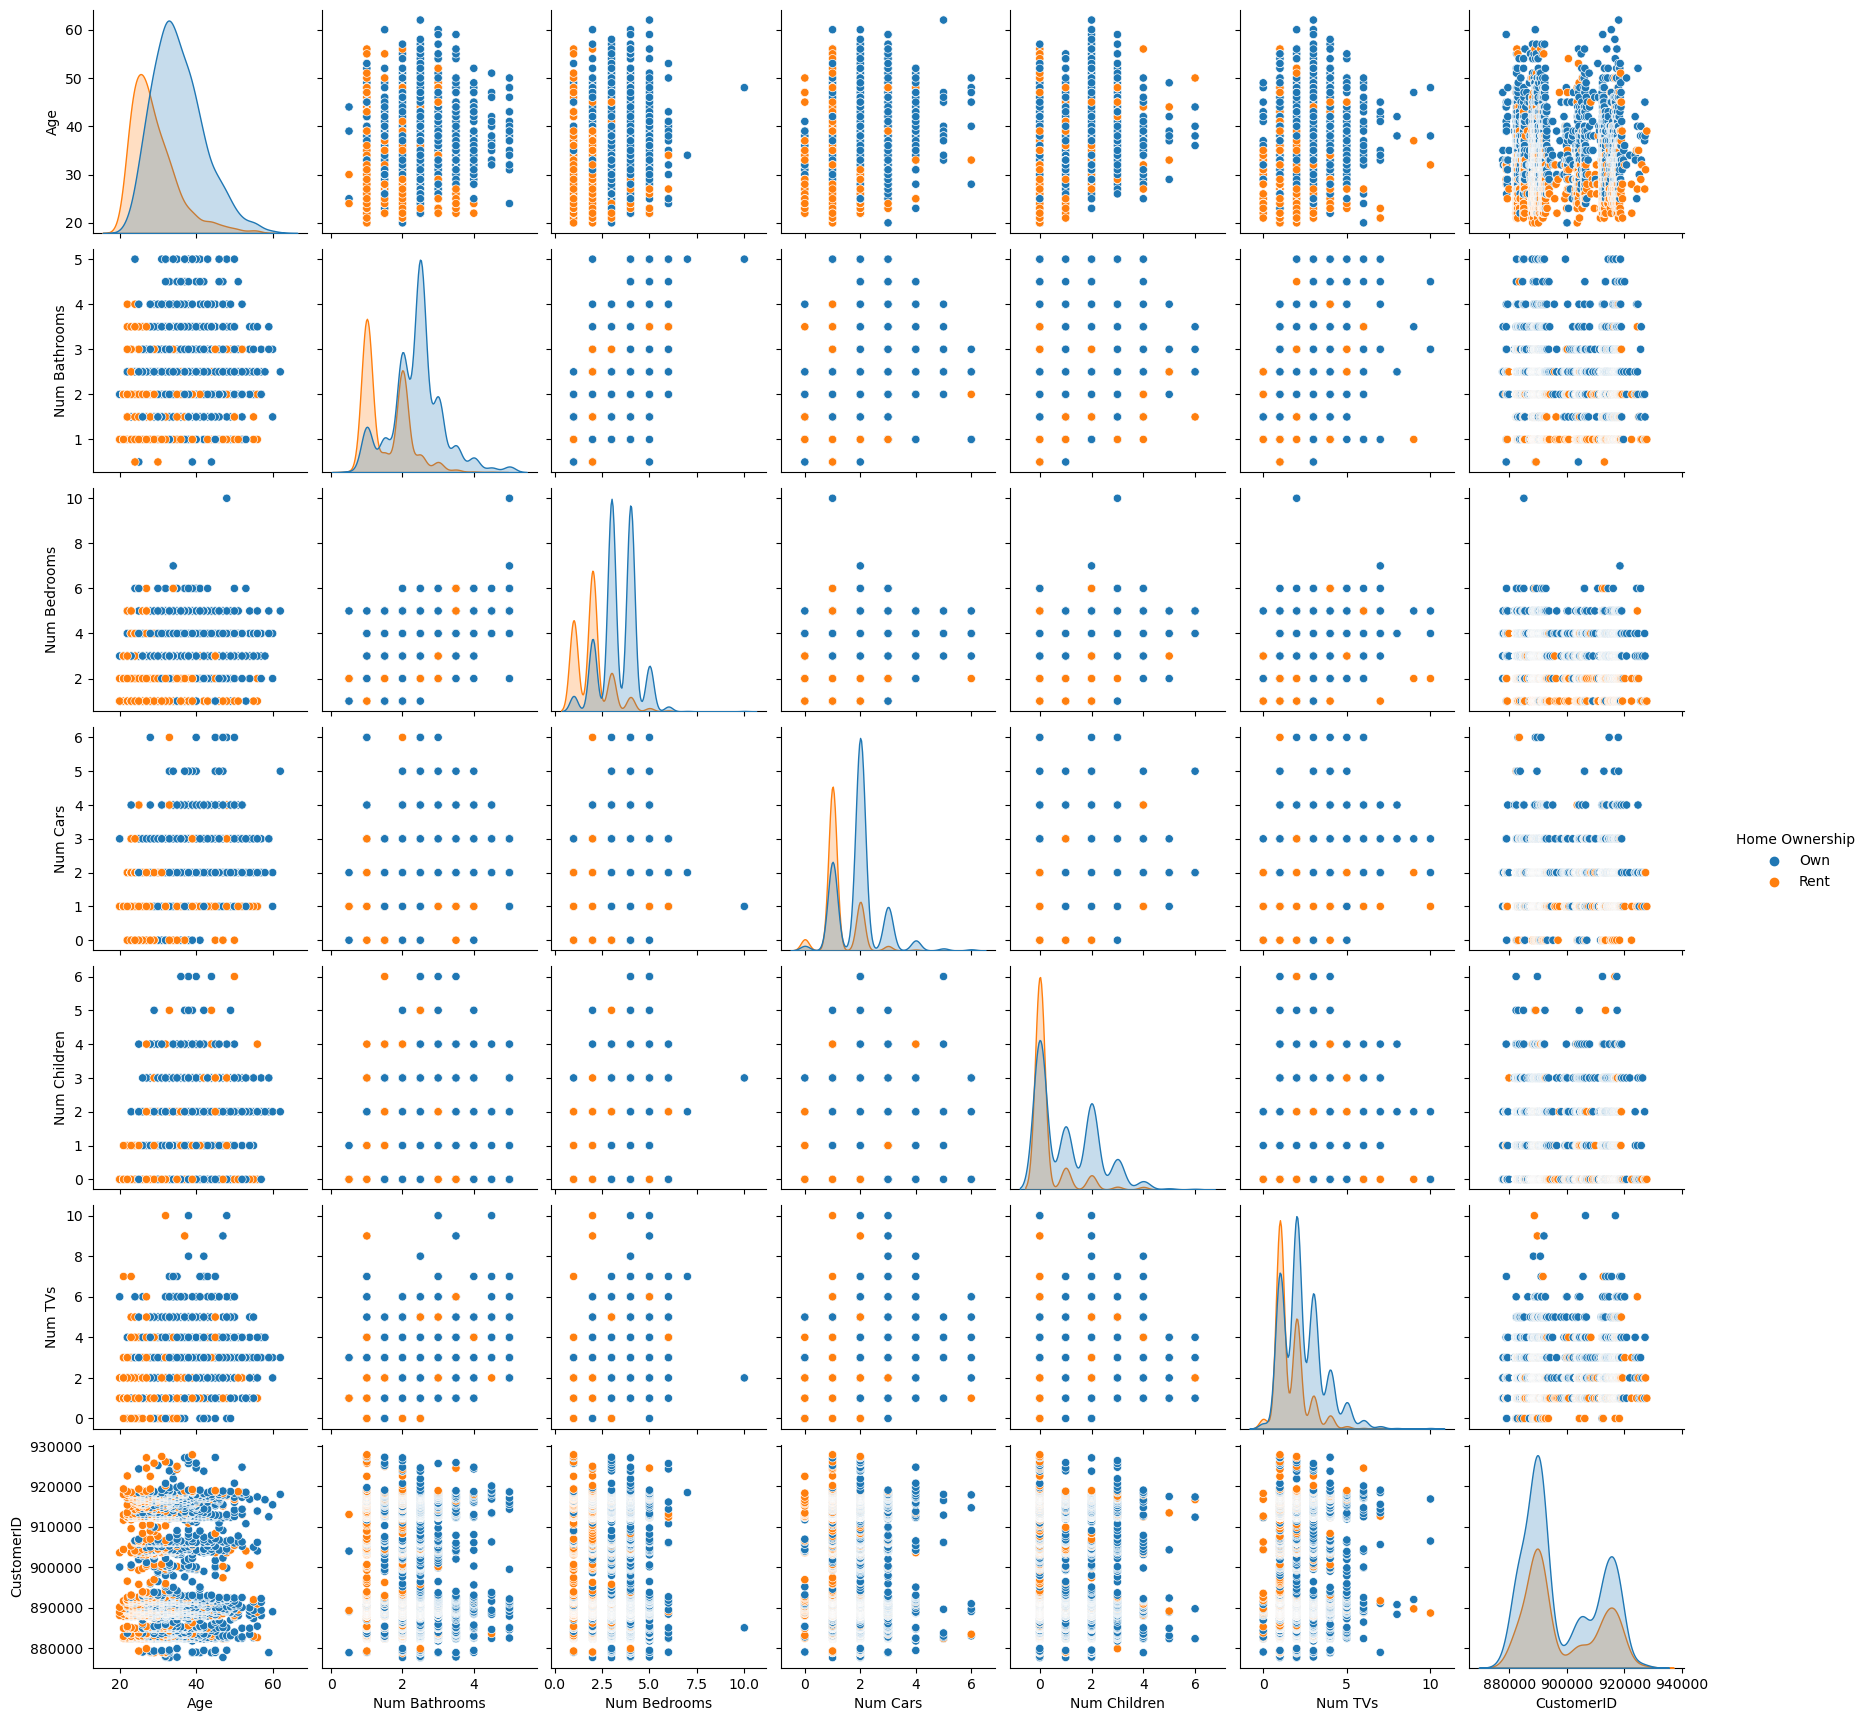

In [26]:
sns.pairplot(data,hue="Home Ownership")

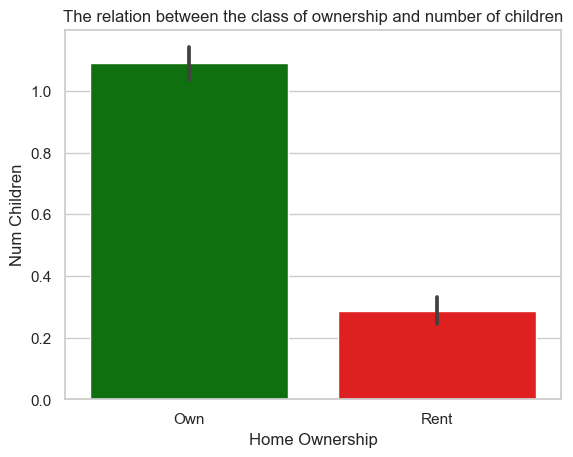

In [88]:
colors = {'Rent': 'red', 'Own': 'green'}

sns.set_theme(style="whitegrid")
sns.barplot(data=data, x="Home Ownership", y="Num Children", palette=colors)
plt.title("The relation between the class of ownership and number of children")
plt.show()

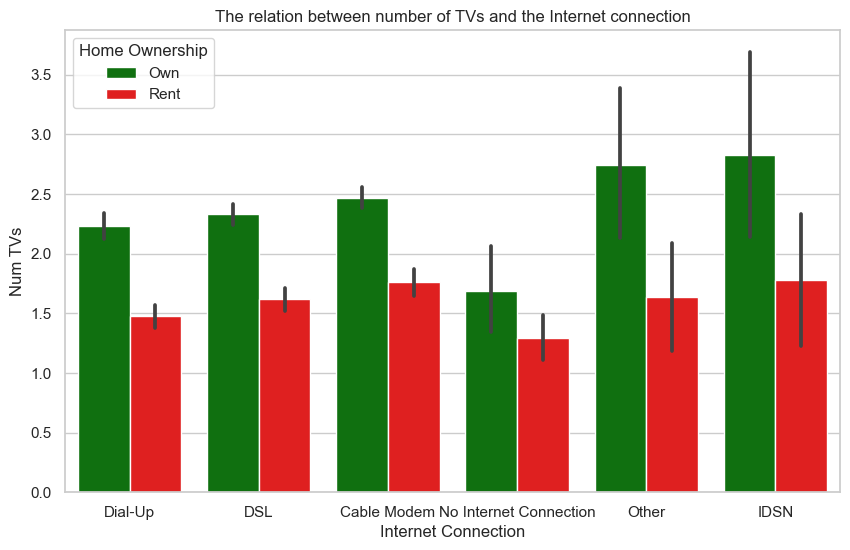

In [80]:
colors = {'Rent': 'red', 'Own': 'green', 'Mortgage': 'blue'}

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=data, y="Num TVs", x="Internet Connection", hue="Home Ownership", palette=colors)
plt.title("The relation between number of TVs and the Internet connection")
plt.show()


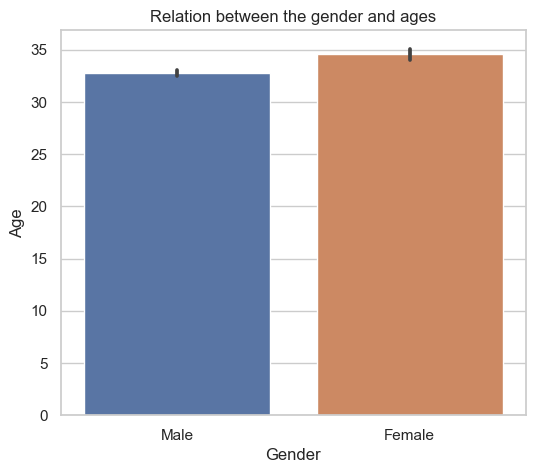

In [89]:
plt.figure(figsize=(6, 5))
sns.set_theme(style="whitegrid")
sns.barplot(data=data, x="Gender",y="Age")
plt.title("Relation between the gender and ages")
plt.show()


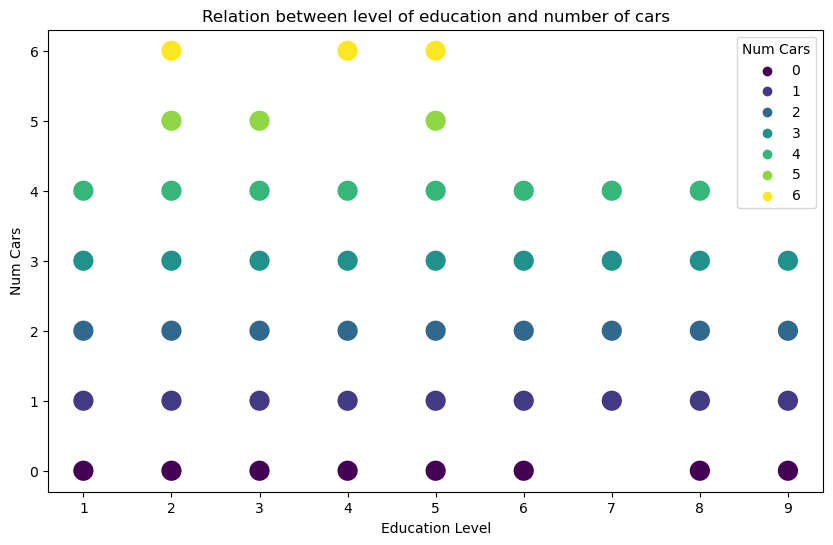

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=data, y="Num Cars", x="Education Level", hue="Num Cars", palette="viridis", ax=ax,s=250)
plt.title("Relation between level of education and number of cars")
plt.show()


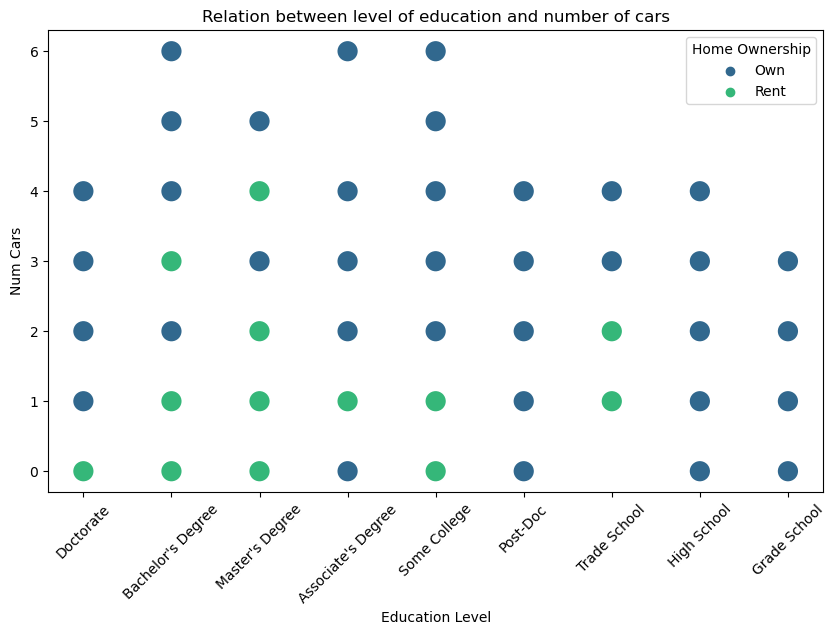

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=data, y="Num Cars", x="Education Level", hue="Home Ownership", palette="viridis", ax=ax,s=250)
plt.xticks(rotation=45) 
plt.title("Relation between level of education and number of cars")
plt.show()

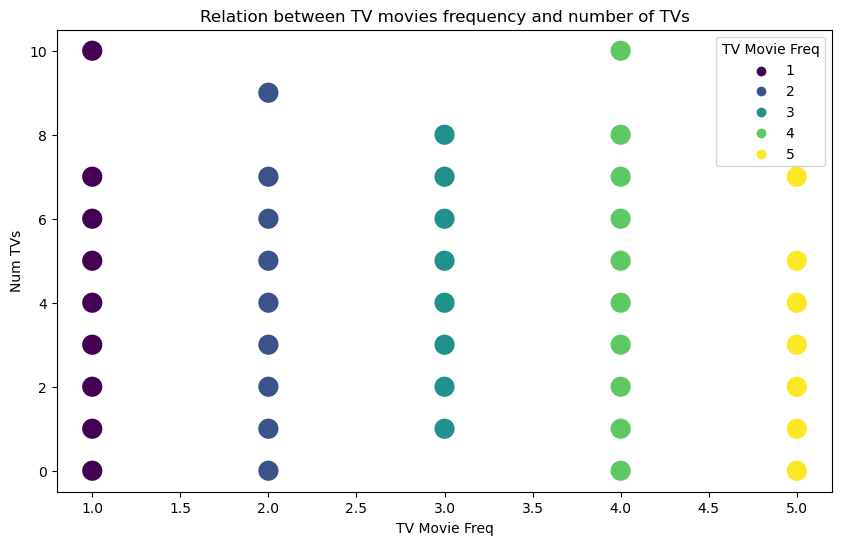

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=data, x="TV Movie Freq", y="Num TVs", hue="TV Movie Freq", palette='viridis', ax=ax,s=250)
plt.title("Relation between TV movies frequency and number of TVs")
plt.legend(title="TV Movie Freq")
plt.show()


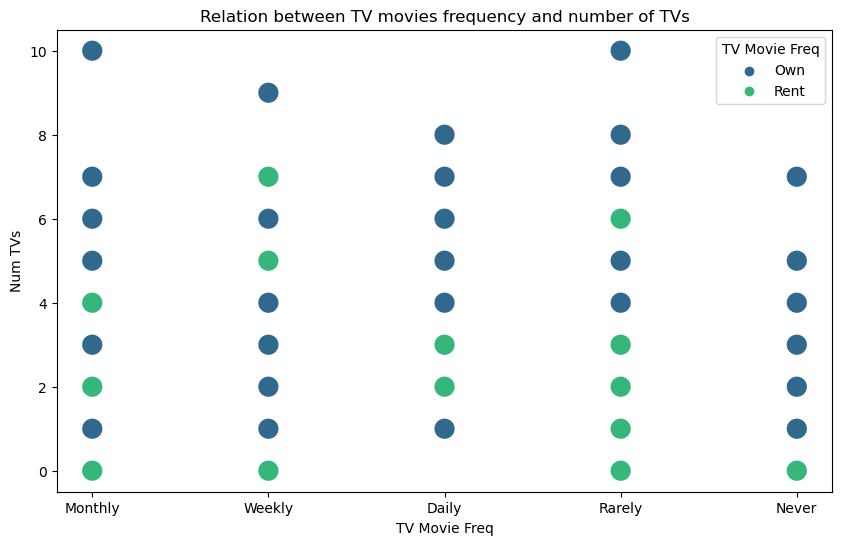

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=data, x="TV Movie Freq", y="Num TVs", hue="Home Ownership", palette='viridis', ax=ax,s=250)
plt.title("Relation between TV movies frequency and number of TVs")
plt.legend(title="TV Movie Freq")
plt.show()

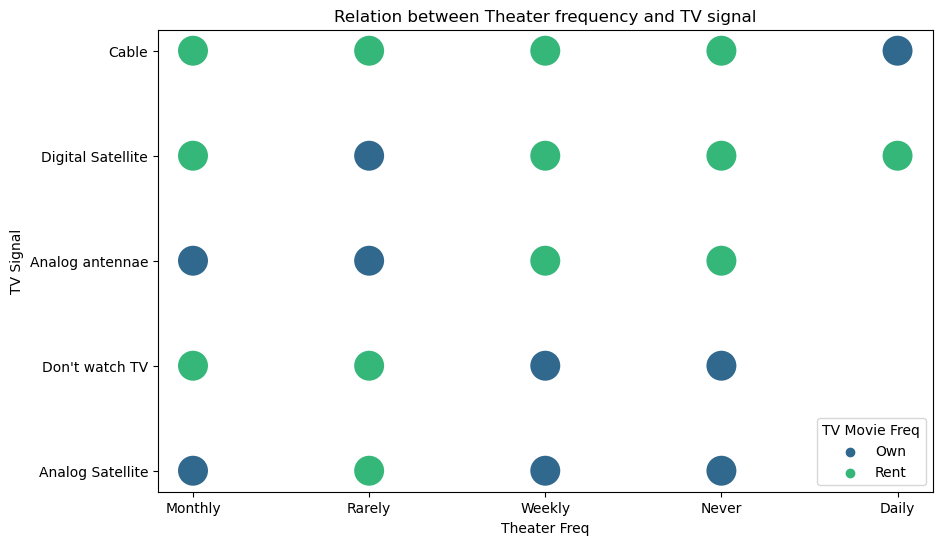

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=data, x="Theater Freq", y="TV Signal", hue="Home Ownership", palette='viridis', ax=ax,s=550)
plt.title("Relation between Theater frequency and TV signal")
plt.legend(title="TV Movie Freq")
plt.show()

## Data Pre-Processing :

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3085 non-null   int64  
 1   Education Level      3085 non-null   object 
 2   Gender               3085 non-null   object 
 3   Internet Connection  3085 non-null   object 
 4   Marital Status       3085 non-null   object 
 5   Movie Selector       3085 non-null   object 
 6   Num Bathrooms        3085 non-null   float64
 7   Num Bedrooms         3085 non-null   int64  
 8   Num Cars             3085 non-null   int64  
 9   Num Children         3085 non-null   int64  
 10  Num TVs              3085 non-null   int64  
 11  PPV Freq             3085 non-null   object 
 12  Prerec Buying Freq   3085 non-null   object 
 13  Prerec Format        3085 non-null   object 
 14  Prerec Renting Freq  3085 non-null   object 
 15  Prerec Viewing Freq  3085 non-null   o

In [4]:
data.drop(columns=["CustomerID","Movie Selector"],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3085 non-null   int64  
 1   Education Level      3085 non-null   object 
 2   Gender               3085 non-null   object 
 3   Internet Connection  3085 non-null   object 
 4   Marital Status       3085 non-null   object 
 5   Num Bathrooms        3085 non-null   float64
 6   Num Bedrooms         3085 non-null   int64  
 7   Num Cars             3085 non-null   int64  
 8   Num Children         3085 non-null   int64  
 9   Num TVs              3085 non-null   int64  
 10  PPV Freq             3085 non-null   object 
 11  Prerec Buying Freq   3085 non-null   object 
 12  Prerec Format        3085 non-null   object 
 13  Prerec Renting Freq  3085 non-null   object 
 14  Prerec Viewing Freq  3085 non-null   object 
 15  Theater Freq         3085 non-null   o

In [35]:
object_list=["Education Level","Gender","Internet Connection","Marital Status","PPV Freq","Prerec Buying Freq",
           "Prerec Format","Prerec Renting Freq","Prerec Viewing Freq","Theater Freq","TV Movie Freq","TV Signal"
            ,"Home Ownership"]

for col in object_list:
    print(data[col].value_counts(),"\n")

Education Level
Bachelor's Degree     1630
Master's Degree        784
Some College           298
Doctorate              136
Associate's Degree     106
High School             57
Post-Doc                29
Grade School            27
Trade School            18
Name: count, dtype: int64 

Gender
Male      2391
Female     694
Name: count, dtype: int64 

Internet Connection
DSL                       1151
Cable Modem               1099
Dial-Up                    654
No Internet Connection     101
Other                       42
IDSN                        38
Name: count, dtype: int64 

Marital Status
Married          1913
Never Married     933
Divorced          135
Other              73
Separated          31
Name: count, dtype: int64 

PPV Freq
Never      1846
Rarely      855
Monthly     290
Weekly       87
Daily         7
Name: count, dtype: int64 

Prerec Buying Freq
Rarely     1458
Monthly    1068
Never       349
Weekly      208
Daily         2
Name: count, dtype: int64 

Prerec Format
DVD

In [6]:
Label_categ=["Internet Connection" ,"Marital Status","Prerec Format","TV Signal"]
Ordinal_categ=["Education Level" ,"PPV Freq","Prerec Buying Freq","Prerec Renting Freq"
               ,"Prerec Viewing Freq","Theater Freq","TV Movie Freq"]

for col in Label_categ :
    data[col]=LabelEncoder().fit_transform(data[col])
    

for col in Ordinal_categ :
    column_data=data[[col]].values.reshape(-1,1)
    data[col]=ce.OrdinalEncoder().fit_transform(data[col])

In [7]:
Get_Dumm=["Gender"]

for col in Get_Dumm :
    Encoded_with_getdummies=pd.get_dummies(data[col],drop_first=False,dtype="int")
    data=pd.concat([data,Encoded_with_getdummies],axis=1)
    data.drop(col,axis=1,inplace=True)

In [8]:
data.head()

,Age,Education Level,Internet Connection,Marital Status,Num Bathrooms,Num Bedrooms,Num Cars,Num Children,Num TVs,PPV Freq,Prerec Buying Freq,Prerec Format,Prerec Renting Freq,Prerec Viewing Freq,Theater Freq,TV Movie Freq,TV Signal,Home Ownership,Female,Male
0,33,1,2,1,2.5,3,1,0,2,1,1,1,1,1,1,1,2,Own,0,1
1,47,1,1,1,2.0,2,2,1,1,2,1,1,2,2,2,2,2,Own,0,1
2,35,2,0,1,2.5,4,2,2,2,1,2,1,2,1,2,3,2,Own,0,1
3,32,2,0,1,3.5,5,2,2,3,2,2,1,2,1,1,2,2,Own,0,1
4,32,2,4,1,2.5,4,2,0,1,1,2,1,3,2,3,2,3,Own,0,1


In [39]:
data.describe()

,Age,Education Level,Internet Connection,Marital Status,Num Bathrooms,Num Bedrooms,Num Cars,Num Children,Num TVs,PPV Freq,Prerec Buying Freq,Prerec Format,Prerec Renting Freq,Prerec Viewing Freq,Theater Freq,TV Movie Freq,TV Signal,Female,Male
count,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000
mean,33.156240,2.807455,1.033063,1.336143,2.096759,2.878444,1.682658,0.806483,2.098865,1.880065,1.903728,1.398379,2.298541,1.916045,1.645705,2.711831,2.173096,0.224959,0.775041
std,7.239346,1.429678,1.062665,0.646857,0.812988,1.150117,0.802138,1.111995,1.230140,0.700107,0.851947,1.029303,0.854917,0.765513,0.753667,1.308807,0.704711,0.417623,0.417623
min,20.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,0.000000,1.000000,1.500000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000
50%,32.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,38.000000,3.000000,2.000000,2.000000,2.500000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000,1.000000
max,62.000000,9.000000,5.000000,4.000000,5.000000,10.000000,6.000000,6.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.000000


## Splitting data to Features and Target groups:

In [9]:
F=data.drop("Home Ownership",axis=1)
T=data["Home Ownership"]

## Splitting Features and Target groups into train and Test groups : 

In [10]:
Ftrain, Ftest, Ttrain, Ttest = train_test_split(F, T, test_size=0.20,random_state=0)

## 1- KNN Model :

In [33]:
KNN=KNeighborsClassifier()

KNN_Params = {
    "n_neighbors":list(range(1,15)),
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size":[10,20,30,40,50],
    "p":list(range(2,10))
}

GRS=GridSearchCV(KNN,KNN_Params)
GRS.fit(Ftrain,Ttrain)

print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_neighbors': 13, 'p': 2} 

0.8290159397557713


In [11]:
KNN=KNeighborsClassifier(algorithm="kd_tree",leaf_size=40,n_neighbors=13)
KNN.fit(Ftrain,Ttrain)
KNN_Pred=KNN.predict(Ftest)
KNN_Pred_Train=KNN.predict(Ftrain)

In [12]:
print("Classification Report for the test group : \n")
print(classification_report(Ttest,KNN_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Ttrain,KNN_Pred_Train),"\n\n")


Classification Report for the test group : 

              precision    recall  f1-score   support

         Own       0.83      0.87      0.85       395
        Rent       0.74      0.68      0.71       222

    accuracy                           0.80       617
   macro avg       0.78      0.77      0.78       617
weighted avg       0.80      0.80      0.80       617
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         Own       0.86      0.90      0.88      1601
        Rent       0.80      0.74      0.77       867

    accuracy                           0.84      2468
   macro avg       0.83      0.82      0.83      2468
weighted avg       0.84      0.84      0.84      2468
 




[[343  52]
 [ 72 150]]


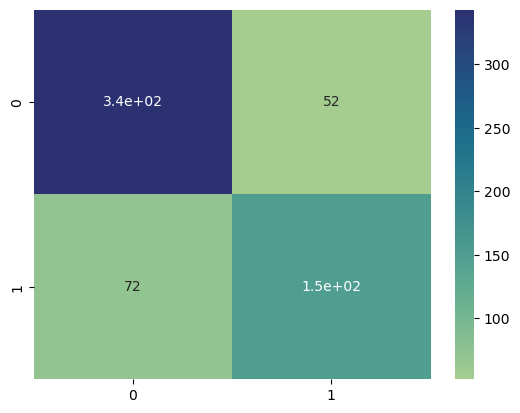

In [18]:
CM_KNN=confusion_matrix(Ttest,KNN_Pred)
print(CM_KNN)
sns.heatmap(CM_KNN,annot=True,cmap="crest")
plt.show()

## 2- GaussianNB Model :

In [38]:
GNB=GaussianNB()

GNB_Params = {
 "var_smoothing":[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,2e-0,1e-0],
}

GRS=GridSearchCV(GNB,GNB_Params)
GRS.fit(Ftrain,Ttrain)

print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'var_smoothing': 0.01} 

0.8124019676277602


In [19]:
GNB=GaussianNB(var_smoothing=0.01)
GNB.fit(Ftrain,Ttrain)
GNB_Pred=GNB.predict(Ftest)
GNB_Pred_Train=GNB.predict(Ftrain)

In [20]:
print("Classification Report for the test group : \n")
print(classification_report(Ttest,GNB_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Ttrain,GNB_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         Own       0.88      0.77      0.82       395
        Rent       0.67      0.82      0.73       222

    accuracy                           0.79       617
   macro avg       0.77      0.79      0.78       617
weighted avg       0.80      0.79      0.79       617
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         Own       0.90      0.81      0.85      1601
        Rent       0.70      0.83      0.76       867

    accuracy                           0.82      2468
   macro avg       0.80      0.82      0.81      2468
weighted avg       0.83      0.82      0.82      2468
 




[[305  90]
 [ 41 181]]


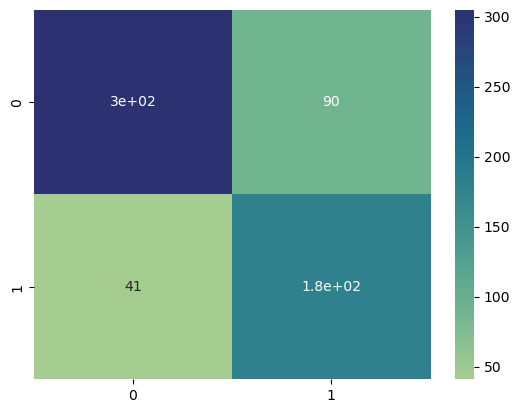

In [22]:
CM_GNB=confusion_matrix(Ttest,GNB_Pred)
print(CM_GNB)
sns.heatmap(CM_GNB,annot=True,cmap="crest")
plt.show()

## 3- Random Forest Model :

In [42]:
RFC=RandomForestClassifier()

RFC_Params = {
  "n_estimators":[50,100,200,300,400,500,600,700,800],
  "criterion":["gini","entropy", "log_loss"],
  "bootstrap":[True,False],
  "class_weight":["balanced","balanced_subsample"]
}

GRS=GridSearchCV(RFC,RFC_Params)
GRS.fit(Ftrain,Ttrain)

print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'n_estimators': 200} 

0.8589943418383686


In [24]:
RFC=RandomForestClassifier(bootstrap= True, class_weight= 'balanced_subsample', criterion="gini" ,n_estimators= 200)
RFC.fit(Ftrain,Ttrain)
RFC_Pred=RFC.predict(Ftest)
RFC_Pred_Train=RFC.predict(Ftrain)

In [25]:
print("Classification Report for the test group : \n")
print(classification_report(Ttest,RFC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Ttrain,RFC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         Own       0.85      0.85      0.85       395
        Rent       0.74      0.74      0.74       222

    accuracy                           0.81       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.81      0.81      0.81       617
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         Own       1.00      1.00      1.00      1601
        Rent       1.00      1.00      1.00       867

    accuracy                           1.00      2468
   macro avg       1.00      1.00      1.00      2468
weighted avg       1.00      1.00      1.00      2468
 




[[336  59]
 [ 57 165]]


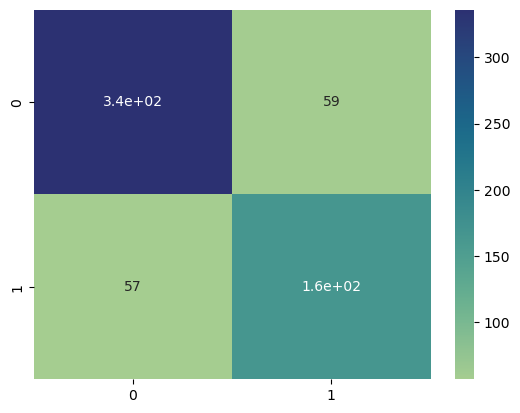

In [27]:
CM_RFC=confusion_matrix(Ttest,RFC_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="crest")
plt.show()

## Features Importance for Random Forest Model :

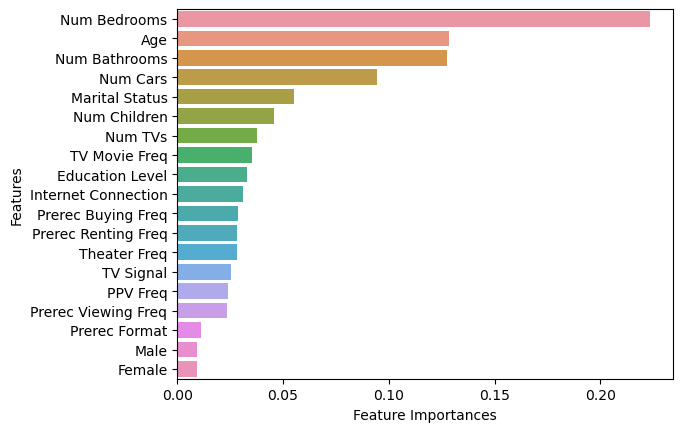

In [48]:
feature_scores = pd.Series(RFC.feature_importances_,
                          index = Ftrain.columns).sort_values(ascending = False)

sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

In [49]:
Ftrain_RFC=Ftrain.drop(columns=["Male","Female","Prerec Format"],axis=1)

RFC=RandomForestClassifier()

RFC_Params = {
  "n_estimators":[50,100,200,300,400,500,600,700,800],
  "criterion":["gini","entropy", "log_loss"],
  "bootstrap":[True,False],
  "class_weight":["balanced","balanced_subsample"]
}

GRS=GridSearchCV(RFC,RFC_Params)
GRS.fit(Ftrain_RFC,Ttrain)

print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'n_estimators': 600} 

0.8581838040255889


In [28]:
RFC=RandomForestClassifier(bootstrap= True, class_weight= 'balanced_subsample', criterion="gini" ,n_estimators= 600)
RFC.fit(Ftrain,Ttrain)
RFC_Pred=RFC.predict(Ftest)
RFC_Pred_Train=RFC.predict(Ftrain)

In [29]:
print("Classification Report for the test group : \n")
print(classification_report(Ttest,RFC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Ttrain,RFC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         Own       0.86      0.86      0.86       395
        Rent       0.74      0.75      0.75       222

    accuracy                           0.82       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.82      0.82      0.82       617
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         Own       1.00      1.00      1.00      1601
        Rent       1.00      1.00      1.00       867

    accuracy                           1.00      2468
   macro avg       1.00      1.00      1.00      2468
weighted avg       1.00      1.00      1.00      2468
 




[[338  57]
 [ 56 166]]


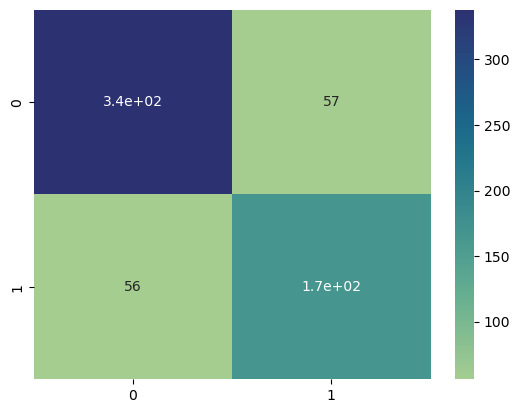

In [30]:
CM_RFC=confusion_matrix(Ttest,RFC_Pred)
print(CM_RFC)
sns.heatmap(CM_RFC,annot=True,cmap="crest")
plt.show()

## 4- Decision Tree Classifier :

In [52]:
DTC = DecisionTreeClassifier()

DTC_Params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' :list(range(2,10)),
    'criterion': ['gini', 'entropy'],
    'min_samples_split' : list(range(2,10))
}

GRS = GridSearchCV(DTC, DTC_Params, cv = 5)
GRS.fit(Ftrain, Ttrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.8508922485649292


In [31]:
DTC=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 4, min_samples_split= 2)
DTC.fit(Ftrain,Ttrain)
DTC_Pred=DTC.predict(Ftest)
DTC_Pred_Train=DTC.predict(Ftrain)

In [32]:
print("Classification Report for the test group : \n")
print(classification_report(Ttest,DTC_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Ttrain,DTC_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         Own       0.88      0.84      0.85       395
        Rent       0.73      0.79      0.76       222

    accuracy                           0.82       617
   macro avg       0.80      0.81      0.81       617
weighted avg       0.82      0.82      0.82       617
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         Own       0.91      0.88      0.90      1601
        Rent       0.80      0.84      0.82       867

    accuracy                           0.87      2468
   macro avg       0.85      0.86      0.86      2468
weighted avg       0.87      0.87      0.87      2468
 




[[330  65]
 [ 47 175]]


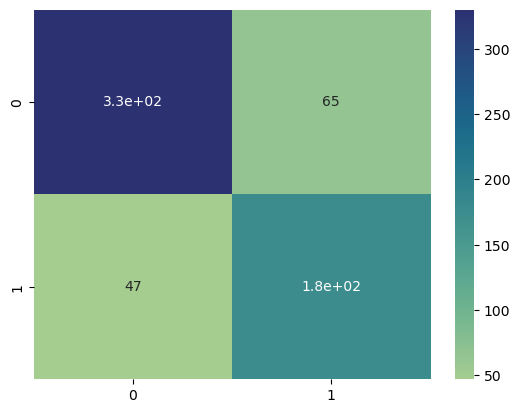

In [35]:
CM_DTC=confusion_matrix(Ttest,DTC_Pred)
print(CM_DTC)
sns.heatmap(CM_DTC,annot=True,cmap="crest")
plt.show()

## 5- XGBoost Model :

In [41]:
Dict = {"Own":1,"Rent":0}

XGB_Ttrain=Ttrain.map(Dict)
XGB_Ttest=Ttest.map(Dict)

In [61]:
XGB = XGBClassifier()

XGB_Params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

GRS = GridSearchCV(XGB, XGB_Params, cv = 7)
GRS.fit(Ftrain, XGB_Ttrain)

print(GRS.best_params_)
print(GRS.best_score_)

{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
0.8577694437290754


In [42]:
XGB = XGBClassifier(colsample_bytree= 0.9 ,learning_rate= 0.01, max_depth= 3 ,n_estimators= 300,subsample=0.9)
XGB.fit(Ftrain,XGB_Ttrain)
XGB_Pred=XGB.predict(Ftest)
XGB_Pred_Train=XGB.predict(Ftrain)

In [43]:
print("Classification Report for the test group : \n")
print(classification_report(XGB_Ttest,XGB_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(XGB_Ttrain,XGB_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       222
           1       0.88      0.85      0.87       395

    accuracy                           0.83       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.83      0.83      0.83       617
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       867
           1       0.90      0.89      0.90      1601

    accuracy                           0.87      2468
   macro avg       0.85      0.85      0.85      2468
weighted avg       0.87      0.87      0.87      2468
 




[[338  57]
 [ 56 166]]


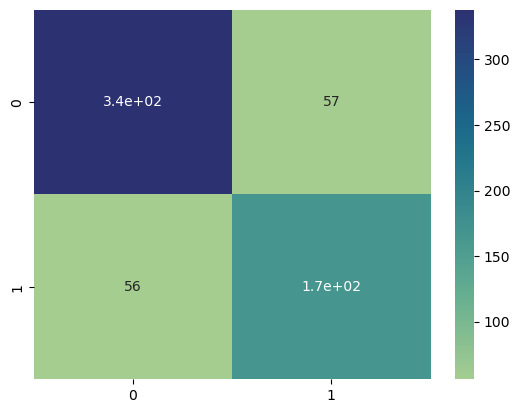

In [38]:
CM_XGB=confusion_matrix(Ttest,RFC_Pred)
print(CM_XGB)
sns.heatmap(CM_XGB,annot=True,cmap="crest")
plt.show()

## Applying the voting classifier :

In [44]:
classifiers = [('Decision Tree', DTC), ("Random Forest", RFC),
             ("Naive Bayes", GNB), ("XGBOOST", XGB),("KNeighbors",KNN)]

Voting = VotingClassifier(estimators = classifiers)

Voting.fit(Ftrain, Ttrain)
Voting_pred = Voting.predict(Ftest)
Train_Voting_Pred =Voting.predict(Ftrain)

print("Testing Classification Report VotingClassifier: ")
print(classification_report(Ttest, Voting_pred))
print("Training Classification Report VotingClassifier: ")
print(classification_report(Ttrain, Train_Voting_Pred))

Testing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

         Own       0.87      0.85      0.86       395
        Rent       0.74      0.78      0.76       222

    accuracy                           0.82       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.82      0.82      0.82       617

Training Classification Report VotingClassifier: 
              precision    recall  f1-score   support

         Own       0.92      0.90      0.91      1601
        Rent       0.82      0.85      0.83       867

    accuracy                           0.88      2468
   macro avg       0.87      0.87      0.87      2468
weighted avg       0.88      0.88      0.88      2468



[[176  46]
 [ 58 337]]


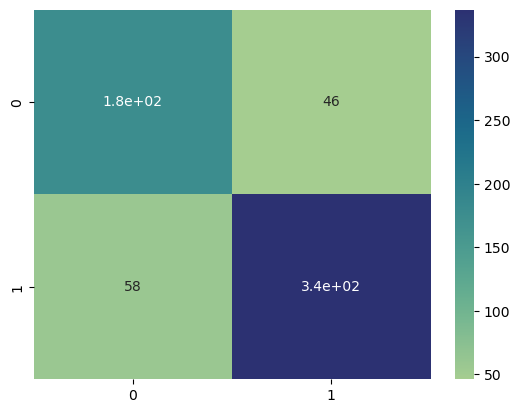

In [46]:
CM_XGB=confusion_matrix(XGB_Ttest,XGB_Pred)
print(CM_XGB)
sns.heatmap(CM_XGB,annot=True,cmap="crest")
plt.show()

## Final Overview :

## Saving the encoded dataframe as csv file :

In [48]:
data.to_csv("Encoded_data_except_home_ownership.csv",index=False)